<h4>| Base contendo todas as questões</h4>

In [3]:
from diskcache import Cache
from appdirs import user_cache_dir

cache = Cache(user_cache_dir("cache"))
GENERATED_DATASET_PATH = cache.get("GENERATED_DATASET_PATH")

In [4]:
import pandas as pd
from pycaret.classification import *

df = pd.read_csv(f'{GENERATED_DATASET_PATH}/df.csv')

Técnicas de balanceamento aceitos:

| Técnica              | Tipo         | Descrição                                                                 |
|----------------------|--------------|---------------------------------------------------------------------------|
| `SMOTE()`            | Oversampling | Gera novos exemplos sintéticos da classe minoritária                      |
| `ADASYN()`           | Oversampling | Semelhante ao SMOTE, mas foca em exemplos mais difíceis de classificar   |
| `RandomOverSampler()`| Oversampling | Replica aleatoriamente instâncias da classe minoritária                  |
| `RandomUnderSampler()`| Undersampling | Remove exemplos aleatórios da classe majoritária                       |
| `SMOTETomek()`       | Combinado    | Combina SMOTE com limpeza de bordas usando Tomek Links                   |
| `SMOTEENN()`         | Combinado    | Combina SMOTE com edição baseada no algoritmo ENN                        |


In [5]:
s = setup(data=df,
          target='curso',
          low_variance_threshold=0.05,
        #   fix_imbalance=True,fix_imbalance_method='RandomUnderSampler',
          train_size=0.8,
          session_id=123)

,Description,Value
0,Session id,123
1,Target,curso
2,Target type,Multiclass
3,Target mapping,"agro: 0, info: 1, mamb: 2"
4,Original data shape,"(611, 211)"
5,Transformed data shape,"(611, 121)"
6,Transformed train set shape,"(488, 121)"
7,Transformed test set shape,"(123, 121)"
8,Numeric features,210
9,Preprocess,True


In [6]:
df.curso.value_counts()

curso
agro    295
mamb    186
info    130
Name: count, dtype: int64

In [6]:
s.y_train_transformed.value_counts()

curso
0    236
2    148
1    104
Name: count, dtype: int64

In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5982,0.7256,0.5982,0.5710,0.5502,0.2987,0.3299,0.0310
rf,Random Forest Classifier,0.5675,0.7194,0.5675,0.5264,0.5082,0.2397,0.2727,0.0470
lightgbm,Light Gradient Boosting Machine,0.5572,0.7019,0.5572,0.5415,0.5379,0.2687,0.2765,0.1680
gbc,Gradient Boosting Classifier,0.5471,0.0000,0.5471,0.5262,0.5280,0.2506,0.2571,0.0680
lr,Logistic Regression,0.5124,0.0000,0.5124,0.5053,0.5015,0.2123,0.2162,0.1920
lda,Linear Discriminant Analysis,0.5123,0.0000,0.5123,0.5208,0.5086,0.2209,0.2243,0.0120
knn,K Neighbors Classifier,0.5083,0.6475,0.5083,0.4996,0.4968,0.1941,0.1980,0.0970
ada,Ada Boost Classifier,0.5062,0.0000,0.5062,0.5036,0.4937,0.1914,0.1965,0.0210
ridge,Ridge Classifier,0.5061,0.0000,0.5061,0.4936,0.4932,0.1981,0.2019,0.0100
svm,SVM - Linear Kernel,0.4999,0.0000,0.4999,0.5332,0.4908,0.2199,0.2322,0.0120


#### 📊 Tune_Model - Aplicando Hiperparâmetros

##### 💻️ Random Forest Classifier

In [10]:
rf = create_model('rf')

tuned_rf = tune_model(rf, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5306,0.6852,0.5306,0.4249,0.4694,0.1798,0.1935
1,0.5918,0.7657,0.5918,0.5826,0.5417,0.2751,0.3068
2,0.5510,0.6729,0.5510,0.4369,0.4796,0.1967,0.2228
3,0.6327,0.7814,0.6327,0.7034,0.5713,0.3408,0.3903
4,0.5918,0.6861,0.5918,0.6075,0.5600,0.2970,0.3166
5,0.5918,0.7984,0.5918,0.5902,0.5384,0.2746,0.3136
6,0.5510,0.7128,0.5510,0.4645,0.4569,0.1895,0.2660
7,0.5510,0.6439,0.5510,0.5432,0.5052,0.2355,0.2549
8,0.5833,0.7250,0.5833,0.5150,0.5177,0.2604,0.3045


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5306,0.6815,0.5306,0.5569,0.5319,0.2858,0.2928
1,0.6122,0.7657,0.6122,0.6145,0.6100,0.3680,0.3703
2,0.6122,0.6534,0.6122,0.6148,0.6124,0.3810,0.3817
3,0.5714,0.7436,0.5714,0.6212,0.5861,0.3421,0.3484
4,0.5102,0.7139,0.5102,0.5406,0.5198,0.2510,0.2544
5,0.5306,0.7468,0.5306,0.5605,0.5424,0.2682,0.2703
6,0.5918,0.7424,0.5918,0.5953,0.5918,0.3544,0.3554
7,0.4898,0.6926,0.4898,0.5230,0.4837,0.2353,0.2466
8,0.5417,0.7294,0.5417,0.5590,0.5424,0.2913,0.2963


Fitting 10 folds for each of 50 candidates, totalling 500 fits


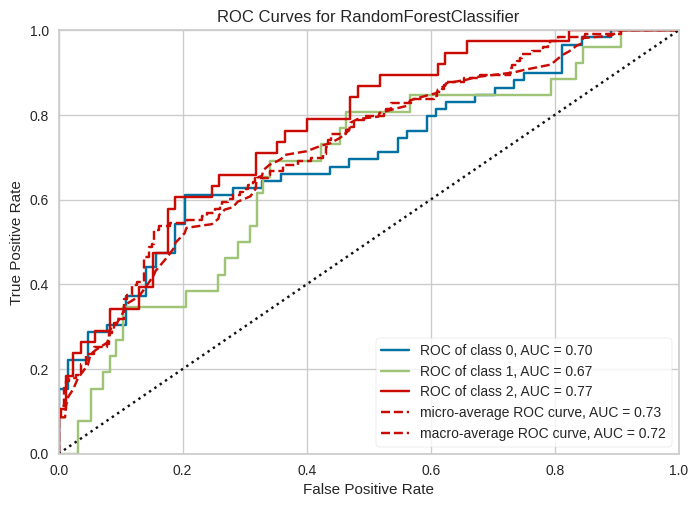

In [9]:
plot_model(tuned_rf)

In [10]:
print(tuned_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_samples_leaf=6, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


In [11]:
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

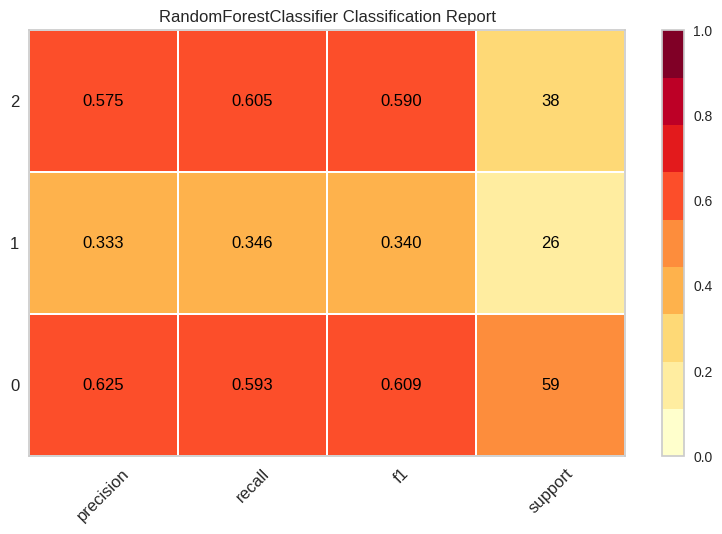

In [12]:
plot_model(tuned_rf, plot='class_report')

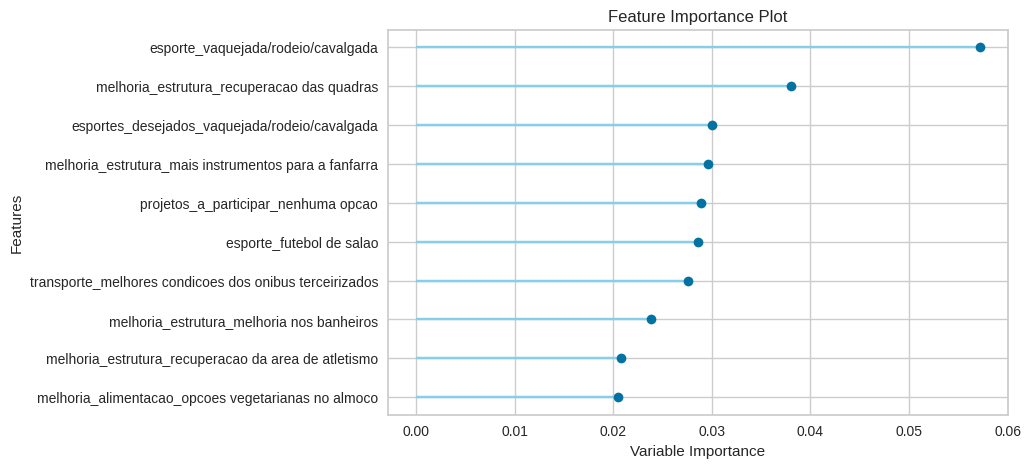

In [13]:
plot_model(tuned_rf, plot='feature')

In [14]:
# plot_model(tuned_rf, plot='tree')

##### 💻️ Extra Trees Classifier

In [9]:
et = create_model('et')
tuned_et = tune_model(et, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6327,0.7233,0.6327,0.6393,0.6077,0.3632,0.3881
1,0.6735,0.8123,0.6735,0.6864,0.6516,0.4392,0.4592
2,0.5714,0.7085,0.5714,0.4655,0.4966,0.2228,0.2634
3,0.5918,0.7246,0.5918,0.5633,0.5378,0.2730,0.3096
4,0.5714,0.6979,0.5714,0.4749,0.5176,0.2723,0.2855
5,0.6122,0.7498,0.6122,0.6499,0.5753,0.3124,0.3549
6,0.6122,0.7278,0.6122,0.7003,0.5607,0.3204,0.3806
7,0.5918,0.7159,0.5918,0.6033,0.5573,0.3108,0.3305
8,0.5833,0.7216,0.5833,0.4745,0.5100,0.2593,0.3002


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5510,0.6967,0.5510,0.5575,0.5521,0.2963,0.2977
1,0.5918,0.7713,0.5918,0.5859,0.5879,0.3365,0.3372
2,0.5714,0.6608,0.5714,0.5508,0.5588,0.2986,0.3001
3,0.5918,0.7770,0.5918,0.6185,0.5999,0.3620,0.3658
4,0.5102,0.7092,0.5102,0.5200,0.5130,0.2369,0.2380
5,0.5306,0.7411,0.5306,0.5565,0.5404,0.2571,0.2586
6,0.6531,0.7335,0.6531,0.6359,0.6376,0.4349,0.4411
7,0.4286,0.6925,0.4286,0.4270,0.4270,0.1033,0.1035
8,0.5625,0.7477,0.5625,0.5567,0.5570,0.3039,0.3053


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [8]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
# plot_model(tuned_et, plot='tree')

##### 💻️ Gradient Boosting Classifier

In [18]:
gbc = create_model('gbc')
tuned_gbc = tune_model(gbc, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4898,0.0000,0.4898,0.4748,0.4801,0.1650,0.1658
1,0.5714,0.0000,0.5714,0.5302,0.5364,0.2639,0.2760
2,0.5510,0.0000,0.5510,0.5307,0.5392,0.2632,0.2645
3,0.5306,0.0000,0.5306,0.5103,0.5153,0.2174,0.2206
4,0.4694,0.0000,0.4694,0.4369,0.4496,0.1208,0.1226
5,0.5918,0.0000,0.5918,0.5898,0.5548,0.2847,0.3151
6,0.6327,0.0000,0.6327,0.6144,0.6126,0.3984,0.4060
7,0.5510,0.0000,0.5510,0.5229,0.5323,0.2706,0.2739
8,0.5833,0.0000,0.5833,0.5717,0.5744,0.3235,0.3252


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5918,0.0000,0.5918,0.5882,0.5886,0.3383,0.3390
1,0.7143,0.0000,0.7143,0.7114,0.7073,0.5266,0.5319
2,0.5714,0.0000,0.5714,0.5294,0.5405,0.2712,0.2802
3,0.6735,0.0000,0.6735,0.6694,0.6644,0.4574,0.4642
4,0.4694,0.0000,0.4694,0.4345,0.4479,0.1292,0.1310
5,0.5714,0.0000,0.5714,0.6526,0.5336,0.2412,0.2819
6,0.5306,0.0000,0.5306,0.5360,0.5044,0.2075,0.2245
7,0.5714,0.0000,0.5714,0.5653,0.5672,0.3185,0.3192
8,0.6042,0.0000,0.6042,0.5896,0.5903,0.3462,0.3515


Fitting 10 folds for each of 50 candidates, totalling 500 fits


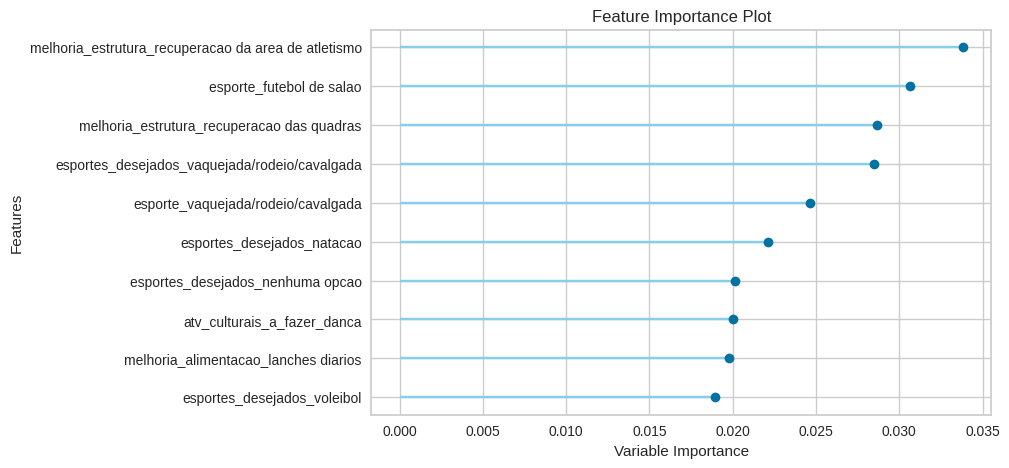

In [19]:
plot_model(tuned_gbc, plot='feature')

##### 💻️ Light Gradient Boosting Machine

In [20]:
lightgbm = create_model('lightgbm')
tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5306,0.6777,0.5306,0.5277,0.5268,0.2482,0.2493
1,0.5714,0.7628,0.5714,0.5604,0.5534,0.2789,0.2877
2,0.5918,0.6420,0.5918,0.5510,0.5585,0.3015,0.3142
3,0.6122,0.7466,0.6122,0.5843,0.5832,0.3388,0.3526
4,0.5306,0.6574,0.5306,0.5155,0.5157,0.2168,0.2215
5,0.5306,0.6964,0.5306,0.5035,0.4972,0.2001,0.2110
6,0.6122,0.7279,0.6122,0.6024,0.5849,0.3526,0.3677
7,0.5714,0.6737,0.5714,0.5403,0.5511,0.3038,0.3074
8,0.6042,0.7542,0.6042,0.5873,0.5909,0.3500,0.3536


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.7108,0.5714,0.5681,0.5583,0.3235,0.3316
1,0.6327,0.7681,0.6327,0.6184,0.6191,0.3896,0.3953
2,0.4898,0.5942,0.4898,0.4424,0.4615,0.1410,0.1442
3,0.5714,0.7499,0.5714,0.5611,0.5590,0.2903,0.2950
4,0.4898,0.6480,0.4898,0.4724,0.4780,0.1604,0.1620
5,0.5102,0.6818,0.5102,0.4728,0.4618,0.1435,0.1588
6,0.6327,0.7334,0.6327,0.6374,0.6302,0.4081,0.4119
7,0.5714,0.6707,0.5714,0.5464,0.5438,0.2884,0.2984
8,0.5833,0.7305,0.5833,0.5693,0.5727,0.3196,0.3219


Fitting 10 folds for each of 50 candidates, totalling 500 fits


##### 💻️ Ridge Classifier

In [21]:
ridge = create_model('ridge')
tuned_ridge = tune_model(ridge, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5102,0.0000,0.5102,0.5189,0.5084,0.2413,0.2446
1,0.5918,0.0000,0.5918,0.5665,0.5663,0.3132,0.3231
2,0.3673,0.0000,0.3673,0.3452,0.3553,-0.0383,-0.0385
3,0.5918,0.0000,0.5918,0.5884,0.5840,0.3306,0.3345
4,0.4898,0.0000,0.4898,0.4679,0.4757,0.1604,0.1620
5,0.5102,0.0000,0.5102,0.4490,0.4517,0.1435,0.1588
6,0.5510,0.0000,0.5510,0.5559,0.5531,0.2954,0.2956
7,0.4694,0.0000,0.4694,0.4595,0.4608,0.1518,0.1532
8,0.5000,0.0000,0.5000,0.4960,0.4965,0.2000,0.2006


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4898,0.0000,0.4898,0.4932,0.4870,0.1801,0.1816
1,0.5714,0.0000,0.5714,0.5379,0.5469,0.2809,0.2870
2,0.4082,0.0000,0.4082,0.3711,0.3866,0.0132,0.0134
3,0.5714,0.0000,0.5714,0.5619,0.5561,0.2859,0.2928
4,0.4898,0.0000,0.4898,0.4679,0.4757,0.1604,0.1620
5,0.5306,0.0000,0.5306,0.4526,0.4729,0.1833,0.1992
6,0.6327,0.0000,0.6327,0.6348,0.6322,0.4159,0.4170
7,0.5306,0.0000,0.5306,0.5268,0.5089,0.2312,0.2378
8,0.4792,0.0000,0.4792,0.4679,0.4727,0.1620,0.1624


Fitting 10 folds for each of 50 candidates, totalling 500 fits


##### 💻️ Linear Discriminant Analysis

In [22]:
lda = create_model('lda')
tuned_lda = tune_model(lda, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5306,0.0000,0.5306,0.5499,0.5343,0.2776,0.2811
1,0.5306,0.0000,0.5306,0.5356,0.5249,0.2328,0.2363
2,0.3878,0.0000,0.3878,0.3771,0.3823,0.0108,0.0108
3,0.5918,0.0000,0.5918,0.6088,0.5914,0.3392,0.3437
4,0.4898,0.0000,0.4898,0.4780,0.4820,0.1695,0.1704
5,0.4898,0.0000,0.4898,0.4626,0.4408,0.1097,0.1218
6,0.5714,0.0000,0.5714,0.5886,0.5776,0.3344,0.3359
7,0.5102,0.0000,0.5102,0.5293,0.5172,0.2413,0.2427
8,0.5000,0.0000,0.5000,0.5058,0.5020,0.2169,0.2173


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5510,0.0000,0.5510,0.5730,0.5594,0.3009,0.3027
1,0.6531,0.0000,0.6531,0.6436,0.6466,0.4341,0.4354
2,0.5102,0.0000,0.5102,0.4306,0.4664,0.1665,0.1726
3,0.5510,0.0000,0.5510,0.5408,0.5430,0.2682,0.2699
4,0.4898,0.0000,0.4898,0.4998,0.4939,0.1962,0.1966
5,0.5306,0.0000,0.5306,0.4983,0.5055,0.2097,0.2161
6,0.5714,0.0000,0.5714,0.5746,0.5726,0.3275,0.3277
7,0.5102,0.0000,0.5102,0.4949,0.4977,0.2212,0.2236
8,0.5833,0.0000,0.5833,0.5938,0.5823,0.3443,0.3488


Fitting 10 folds for each of 36 candidates, totalling 360 fits


##### 💻️ SVM - Linear Kernel

In [23]:
svm = create_model('svm')
tuned_svm = tune_model(svm, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4694,0.0000,0.4694,0.5435,0.4444,0.2302,0.2585
1,0.5306,0.0000,0.5306,0.5350,0.5318,0.2467,0.2472
2,0.4898,0.0000,0.4898,0.4154,0.4494,0.1373,0.1417
3,0.5306,0.0000,0.5306,0.5615,0.5371,0.2840,0.2893
4,0.4286,0.0000,0.4286,0.4189,0.4230,0.0804,0.0806
5,0.5102,0.0000,0.5102,0.5391,0.4701,0.1570,0.1732
6,0.6122,0.0000,0.6122,0.7198,0.6274,0.4344,0.4676
7,0.4898,0.0000,0.4898,0.4965,0.4924,0.1993,0.1997
8,0.4583,0.0000,0.4583,0.4653,0.4566,0.1680,0.1702


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4898,0.0000,0.4898,0.4948,0.4889,0.1877,0.1892
1,0.6122,0.0000,0.6122,0.5940,0.5834,0.3345,0.3524
2,0.4082,0.0000,0.4082,0.3645,0.3805,-0.0028,-0.0029
3,0.5510,0.0000,0.5510,0.5328,0.5273,0.2371,0.2468
4,0.4898,0.0000,0.4898,0.4489,0.4611,0.1391,0.1436
5,0.5102,0.0000,0.5102,0.4413,0.4461,0.1353,0.1531
6,0.5918,0.0000,0.5918,0.5822,0.5782,0.3315,0.3384
7,0.5306,0.0000,0.5306,0.5114,0.5092,0.2333,0.2383
8,0.5625,0.0000,0.5625,0.5682,0.5485,0.3043,0.3152


Fitting 10 folds for each of 50 candidates, totalling 500 fits


##### 💻️ Logistic Regression

In [24]:
lr = create_model('lr')
tuned_lr = tune_model(lr, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5102,0.0000,0.5102,0.5162,0.5085,0.2344,0.2369
1,0.5714,0.0000,0.5714,0.5434,0.5501,0.2809,0.2870
2,0.3878,0.0000,0.3878,0.3583,0.3721,-0.0082,-0.0083
3,0.4898,0.0000,0.4898,0.4845,0.4780,0.1689,0.1723
4,0.4694,0.0000,0.4694,0.4556,0.4606,0.1363,0.1370
5,0.5102,0.0000,0.5102,0.4606,0.4535,0.1453,0.1613
6,0.6122,0.0000,0.6122,0.6096,0.6095,0.3834,0.3845
7,0.4898,0.0000,0.4898,0.4866,0.4879,0.1930,0.1931
8,0.5625,0.0000,0.5625,0.5625,0.5601,0.3101,0.3116


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5306,0.0000,0.5306,0.5723,0.5355,0.2921,0.3013
1,0.5714,0.0000,0.5714,0.5785,0.5699,0.3167,0.3195
2,0.4490,0.0000,0.4490,0.4682,0.4577,0.1342,0.1345
3,0.5102,0.0000,0.5102,0.5375,0.5206,0.2309,0.2329
4,0.5102,0.0000,0.5102,0.5428,0.5198,0.2524,0.2565
5,0.5510,0.0000,0.5510,0.5492,0.5466,0.2706,0.2724
6,0.5714,0.0000,0.5714,0.6020,0.5777,0.3496,0.3559
7,0.4694,0.0000,0.4694,0.4902,0.4716,0.1947,0.1982
8,0.5625,0.0000,0.5625,0.5863,0.5671,0.3258,0.3304


Fitting 10 folds for each of 50 candidates, totalling 500 fits


##### 💻️ Ada Boost Classifier

In [25]:
ada = create_model('ada')
tuned_ada = tune_model(ada, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4694,0.0000,0.4694,0.4880,0.4753,0.1759,0.1774
1,0.5918,0.0000,0.5918,0.5676,0.5741,0.3194,0.3242
2,0.4694,0.0000,0.4694,0.4395,0.4457,0.1116,0.1141
3,0.5510,0.0000,0.5510,0.5499,0.5277,0.2349,0.2484
4,0.4490,0.0000,0.4490,0.4261,0.4329,0.0888,0.0901
5,0.5102,0.0000,0.5102,0.5367,0.4862,0.1612,0.1733
6,0.5306,0.0000,0.5306,0.5376,0.5141,0.2184,0.2297
7,0.4694,0.0000,0.4694,0.4588,0.4622,0.1473,0.1480
8,0.5625,0.0000,0.5625,0.5478,0.5532,0.2881,0.2897


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4694,0.0000,0.4694,0.4434,0.4503,0.1097,0.1121
1,0.6122,0.0000,0.6122,0.5210,0.5530,0.3229,0.3469
2,0.4898,0.0000,0.4898,0.3952,0.4350,0.1084,0.1167
3,0.5714,0.0000,0.5714,0.5519,0.5381,0.2592,0.2739
4,0.5102,0.0000,0.5102,0.4642,0.4700,0.1558,0.1664
5,0.5714,0.0000,0.5714,0.5330,0.5325,0.2597,0.2778
6,0.6122,0.0000,0.6122,0.6451,0.5515,0.3184,0.3884
7,0.5306,0.0000,0.5306,0.4131,0.4614,0.1984,0.2167
8,0.5208,0.0000,0.5208,0.4320,0.4721,0.1988,0.2069


Fitting 10 folds for each of 50 candidates, totalling 500 fits


##### 💻️ K Neighbors Classifier

In [26]:
knn = create_model('knn')
tuned_knn = tune_model(knn, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4694,0.5816,0.4694,0.4563,0.4562,0.1097,0.1121
1,0.4898,0.6488,0.4898,0.4980,0.4913,0.1762,0.1770
2,0.5510,0.6741,0.5510,0.5341,0.5340,0.2555,0.2592
3,0.5102,0.6544,0.5102,0.4805,0.4859,0.1730,0.1782
4,0.4082,0.5556,0.4082,0.4078,0.4077,0.0514,0.0514
5,0.5714,0.7449,0.5714,0.6026,0.5801,0.3172,0.3200
6,0.5102,0.6755,0.5102,0.4850,0.4850,0.1978,0.2043
7,0.5102,0.6142,0.5102,0.5094,0.5046,0.2129,0.2153
8,0.5625,0.6743,0.5625,0.5250,0.5271,0.2550,0.2690


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5714,0.6410,0.5714,0.5261,0.5365,0.2687,0.2785
1,0.5714,0.7053,0.5714,0.5650,0.5559,0.2738,0.2822
2,0.4898,0.6247,0.4898,0.4886,0.4828,0.1773,0.1799
3,0.5918,0.7321,0.5918,0.5592,0.5493,0.2852,0.3101
4,0.5306,0.6831,0.5306,0.5347,0.5110,0.2370,0.2444
5,0.5714,0.7258,0.5714,0.5529,0.5581,0.2947,0.2976
6,0.5918,0.7003,0.5918,0.6192,0.5845,0.3333,0.3404
7,0.5102,0.6121,0.5102,0.4880,0.4953,0.2086,0.2106
8,0.4583,0.6588,0.4583,0.4268,0.4372,0.1041,0.1059


Fitting 10 folds for each of 50 candidates, totalling 500 fits


##### 💻️ Decision Tree Classifier

In [27]:
dt = create_model('dt')
tuned_dt = tune_model(dt, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4898,0.5892,0.4898,0.4948,0.4913,0.1811,0.1815
1,0.4898,0.5941,0.4898,0.4853,0.4839,0.1801,0.1816
2,0.4082,0.5073,0.4082,0.3724,0.3855,0.0070,0.0071
3,0.4490,0.5813,0.4490,0.4808,0.4588,0.1573,0.1599
4,0.4082,0.5353,0.4082,0.4197,0.4076,0.0785,0.0799
5,0.3878,0.4959,0.3878,0.3679,0.3717,0.0027,0.0028
6,0.4694,0.5756,0.4694,0.4647,0.4656,0.1518,0.1522
7,0.4286,0.5341,0.4286,0.4274,0.4158,0.0817,0.0835
8,0.4792,0.5867,0.4792,0.4789,0.4779,0.1814,0.1819


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5102,0.6380,0.5102,0.4795,0.4770,0.1612,0.1680
1,0.5918,0.6611,0.5918,0.5306,0.5388,0.2778,0.3084
2,0.6122,0.7218,0.6122,0.5977,0.5995,0.3575,0.3611
3,0.4694,0.6097,0.4694,0.4372,0.4402,0.0887,0.0927
4,0.5306,0.6711,0.5306,0.5367,0.5280,0.2644,0.2677
5,0.5918,0.7139,0.5918,0.5718,0.5759,0.3237,0.3285
6,0.5102,0.6153,0.5102,0.5056,0.4786,0.1683,0.1820
7,0.4490,0.5485,0.4490,0.4327,0.4403,0.1238,0.1241
8,0.4375,0.6633,0.4375,0.5054,0.4409,0.1099,0.1150


Fitting 10 folds for each of 50 candidates, totalling 500 fits


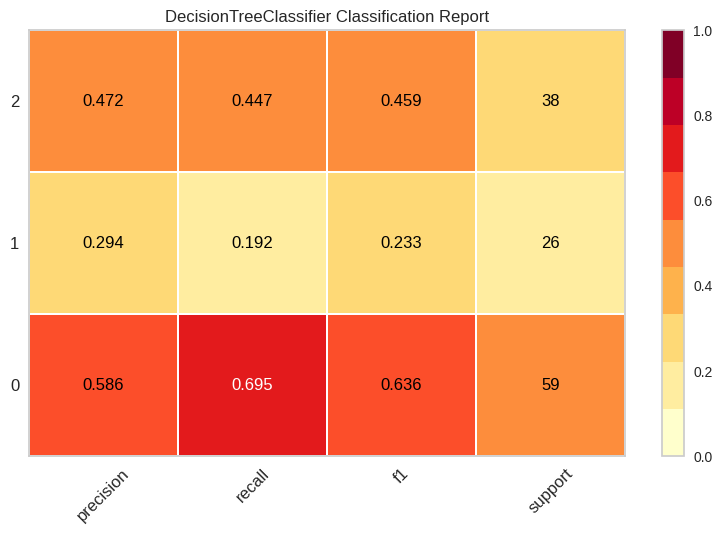

In [28]:
plot_model(tuned_dt, plot='class_report')

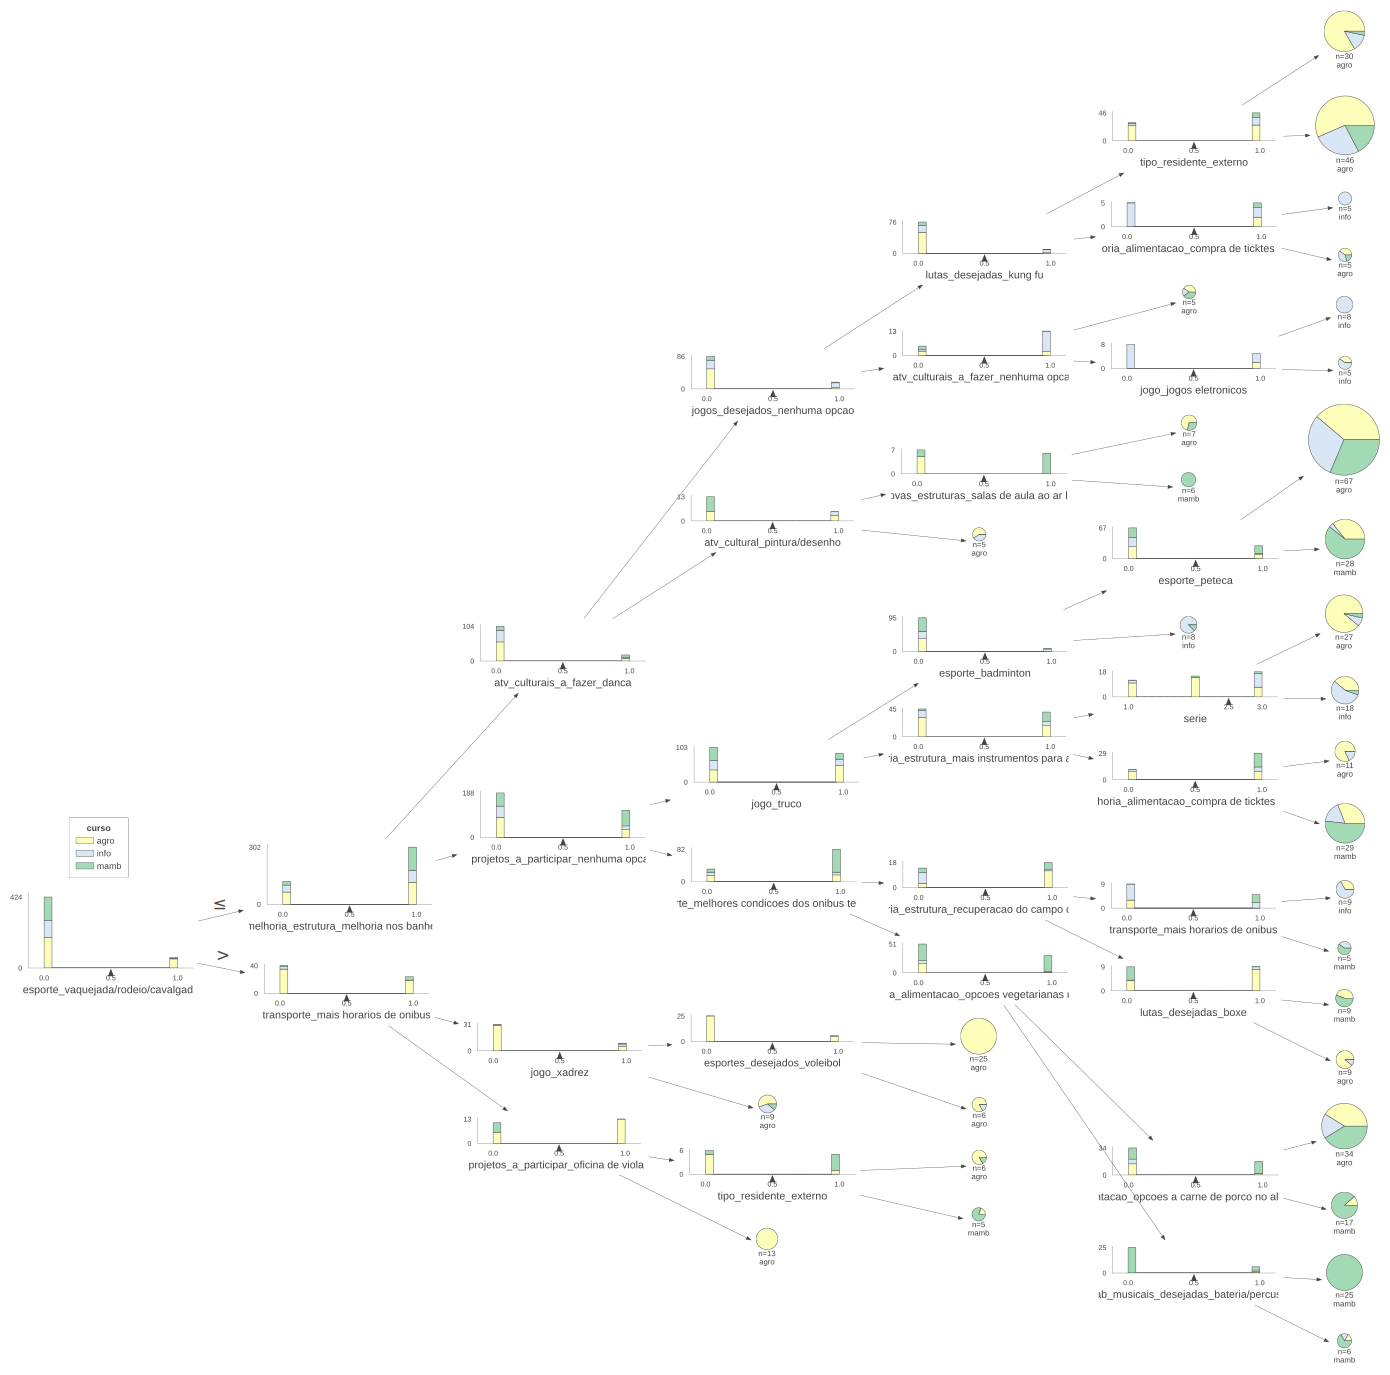

In [29]:
from dtreeviz import *

viz = model(tuned_dt, 
    X_train=s.X_train_transformed,
    y_train=s.y_train_transformed,
    target_name='curso',
    feature_names=s.X_train_transformed.columns.tolist(),
    class_names=['agro', 'info', 'mamb'],
)

viz.view(fontname='sans-serif',
         orientation='LR',
         scale=1.2,
        #  show_node_labels=True
        #  fancy=False,
         )

In [30]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    tuned_dt,
    feature_names=s.X_train_transformed.columns.tolist(),
    class_names=['agro', 'info', 'mamb'],
    filled=True, rounded=True, special_characters=True,
)

graph = graphviz.Source(dot_data)
graph.render("tree", format="pdf", cleanup=True)
# graph.view()


'tree.pdf'

##### 💻️ Quadratic Discriminant Analysis

In [31]:
qda = create_model('qda')
tuned_qda = tune_model(qda, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5102,0.0000,0.5102,0.5510,0.3648,0.0470,0.1528
1,0.5306,0.0000,0.5306,0.5562,0.4032,0.0933,0.2184
2,0.4898,0.0000,0.4898,0.2399,0.3221,0.0000,0.0000
3,0.5102,0.0000,0.5102,0.5510,0.3648,0.0470,0.1528
4,0.4898,0.0000,0.4898,0.2399,0.3221,0.0000,0.0000
5,0.4898,0.0000,0.4898,0.2399,0.3221,0.0000,0.0000
6,0.4898,0.0000,0.4898,0.5310,0.3424,0.0445,0.1489
7,0.5306,0.0000,0.5306,0.5408,0.4150,0.1317,0.2635
8,0.4792,0.0000,0.4792,0.2296,0.3104,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5510,0.0000,0.5510,0.5271,0.5319,0.2467,0.2520
1,0.5102,0.0000,0.5102,0.4986,0.5005,0.1940,0.1958
2,0.5510,0.0000,0.5510,0.5448,0.5476,0.2746,0.2748
3,0.5714,0.0000,0.5714,0.5533,0.5513,0.2764,0.2847
4,0.5510,0.0000,0.5510,0.5615,0.5497,0.2657,0.2688
5,0.5510,0.0000,0.5510,0.5551,0.5287,0.2435,0.2550
6,0.5102,0.0000,0.5102,0.5290,0.5162,0.2452,0.2471
7,0.4490,0.0000,0.4490,0.4780,0.4609,0.1508,0.1520
8,0.5208,0.0000,0.5208,0.5485,0.5312,0.2571,0.2592


Fitting 10 folds for each of 50 candidates, totalling 500 fits


##### 💻️ Dummy Classifier

In [32]:
dummy = create_model('dummy')
tuned_dummy = tune_model(dummy, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4898,0.5000,0.4898,0.2399,0.3221,0.0000,0.0000
1,0.4898,0.5000,0.4898,0.2399,0.3221,0.0000,0.0000
2,0.4898,0.5000,0.4898,0.2399,0.3221,0.0000,0.0000
3,0.4898,0.5000,0.4898,0.2399,0.3221,0.0000,0.0000
4,0.4898,0.5000,0.4898,0.2399,0.3221,0.0000,0.0000
5,0.4898,0.5000,0.4898,0.2399,0.3221,0.0000,0.0000
6,0.4694,0.5000,0.4694,0.2203,0.2999,0.0000,0.0000
7,0.4694,0.5000,0.4694,0.2203,0.2999,0.0000,0.0000
8,0.4792,0.5000,0.4792,0.2296,0.3104,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4694,0.5779,0.4694,0.4623,0.4651,0.1484,0.1487
1,0.3673,0.4851,0.3673,0.3654,0.3657,-0.0154,-0.0154
2,0.4490,0.5545,0.4490,0.4516,0.4494,0.1156,0.1159
3,0.3265,0.4504,0.3265,0.3222,0.3238,-0.0809,-0.0810
4,0.2857,0.4244,0.2857,0.2807,0.2831,-0.1449,-0.1450
5,0.3061,0.4524,0.3061,0.3010,0.3034,-0.1121,-0.1122
6,0.3469,0.4784,0.3469,0.3384,0.3420,-0.0384,-0.0385
7,0.3061,0.4445,0.3061,0.2961,0.3005,-0.1033,-0.1036
8,0.3750,0.5101,0.3750,0.3695,0.3717,0.0048,0.0048


Fitting 10 folds for each of 4 candidates, totalling 40 fits


##### 💻️ Naive Bayes

In [33]:
nb = create_model('nb')
tuned_nb = tune_model(nb, n_iter=50, optimize='F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.6345,0.4286,0.4679,0.4261,0.1452,0.1527
1,0.5714,0.7733,0.5714,0.5958,0.5773,0.3279,0.3325
2,0.4490,0.5999,0.4490,0.3926,0.4183,0.0888,0.0907
3,0.5918,0.7203,0.5918,0.6037,0.5908,0.3599,0.3649
4,0.4694,0.6664,0.4694,0.5156,0.4650,0.1997,0.2136
5,0.5510,0.7128,0.5510,0.5531,0.5505,0.2755,0.2763
6,0.4898,0.6334,0.4898,0.5163,0.4993,0.2178,0.2195
7,0.4490,0.6815,0.4490,0.5165,0.4569,0.1823,0.1917
8,0.4792,0.6923,0.4792,0.5203,0.4826,0.2126,0.2201


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4286,0.6347,0.4286,0.4679,0.4261,0.1452,0.1527
1,0.5918,0.7721,0.5918,0.6152,0.5947,0.3578,0.3645
2,0.4490,0.6045,0.4490,0.3926,0.4183,0.0888,0.0907
3,0.5714,0.7206,0.5714,0.5897,0.5752,0.3301,0.3336
4,0.4898,0.6716,0.4898,0.5533,0.4900,0.2291,0.2474
5,0.5510,0.7118,0.5510,0.5531,0.5505,0.2755,0.2763
6,0.4694,0.6335,0.4694,0.5010,0.4795,0.1906,0.1930
7,0.4490,0.6828,0.4490,0.5165,0.4569,0.1823,0.1917
8,0.4792,0.6940,0.4792,0.5203,0.4826,0.2126,0.2201


Fitting 10 folds for each of 28 candidates, totalling 280 fits
